In [59]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
from pylab import *
import shutil #for split into train, val, test
import random
import seaborn as sns #visualizing the data
import sklearn as sk
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import seaborn as sb

In [60]:
class_dir = ['Healthy', 'Brain_Tumor'] #labels

# source 1: https://www.geeksforgeeks.org/python-shutil-copy-method/
# source 2: https://www.kaggle.com/questions-and-answers/102677

# directory for images (jpg)
root_dir = 'data/' # data root path

val_ratio = 0.15 # 15% of total images -> val  
test_ratio = 0.05 # 5% of total images -> test

for cls in class_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'val/' + cls)
    os.makedirs(root_dir +'test/' + cls)

    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]

    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]


    print("\n*****************************")
    print('Total images: ', len(allFileNames), cls)
    print('Training: ', len(train_FileNames), cls)
    print('Validation: ', len(val_FileNames), cls)
    print('Testing: ', len(test_FileNames), cls)
    print("*****************************")

    try:
        # Copy-pasting folders
        for name in train_FileNames:
            shutil.copy(name, root_dir +'train/' + cls)

        print("Train copied successfully.")

        for name in val_FileNames:
            shutil.copy(name, root_dir +'val/' + cls)

        print("Val copied successfully.")

        for name in test_FileNames:
            shutil.copy(name, root_dir +'test/' + cls)

        print("Test copied successfully.")

    # If source and destination are same
    except shutil.SameFileError:
        print("Source and destination represents the same file.")

    # if there is any permission issue
    except PermissionError:
        print("Permission denied.")

    # For other errors
    except:
        print("Error occurred while copying file.")
        
print("Successfully copied files")

FileExistsError: [Errno 17] File exists: 'data/train/Healthy'

In [61]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/home/nickknapton/Documents/School/BMEN415/project/BMEN415_Final_Project/Classification/GroupImageModel/data/train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary',
                                          shuffle=False)
                                         
test_dataset = test.flow_from_directory("/home/nickknapton/Documents/School/BMEN415/project/BMEN415_Final_Project/Classification/GroupImageModel/data/val/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary',
                                           shuffle=False)

Found 3679 images belonging to 2 classes.
Found 690 images belonging to 2 classes.


In [62]:
classes = test_dataset.class_indices

In [63]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
115/115 [==============================] - 85s 736ms/step - loss: 0.7495 - accuracy: 0.5134 - val_loss: 0.6921 - val_accuracy: 0.5464
Epoch 2/10
115/115 [==============================] - 120s 1s/step - loss: 0.6908 - accuracy: 0.6235 - val_loss: 0.6666 - val_accuracy: 0.5739
Epoch 3/10
115/115 [==============================] - 127s 1s/step - loss: 0.6786 - accuracy: 0.5904 - val_loss: 0.6759 - val_accuracy: 0.6159
Epoch 4/10
 28/115 [======>.......................] - ETA: 1:44 - loss: 0.6586 - accuracy: 0.6266

In [58]:
test2w_dataset = test.flow_from_directory("/home/nickknapton/Documents/School/BMEN415/project/BMEN415_Final_Project/Classification/GroupImageModel/data/test/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')
print(model.evaluate(test_dataset, verbose=1))

Y_pred = model.predict(test_dataset)

print(Y_pred)

Found 231 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/home/nickknapton/Documents/School/BMEN415/project/BMEN415_Final_Project/Classification/GroupImageModel/data/val/Brain_Tumor/Cancer (100).jpg'

In [52]:
conf_mat = confusion_matrix(test_dataset.classes, Y_pred)
print(conf_mat)

[[374   3]
 [  8 305]]


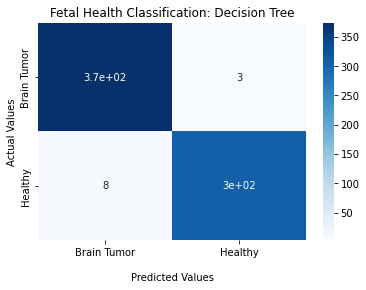

In [53]:
confusion = sb.heatmap(conf_mat, annot=True, cmap='Blues')
confusion.set_title("Fetal Health Classification: Decision Tree")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Brain Tumor', 'Healthy'])
confusion.yaxis.set_ticklabels(['Brain Tumor', 'Healthy'])

plt.show()